In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split , GridSearchCV


from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

from imblearn.over_sampling import SMOTE

### 1. Problem statement

In [ ]:
Predict loan approval

## 2. Data Gathering

In [2]:
df=pd.read_csv('Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_df=df.drop('Loan_ID',axis=1)
loan_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


### 2. EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

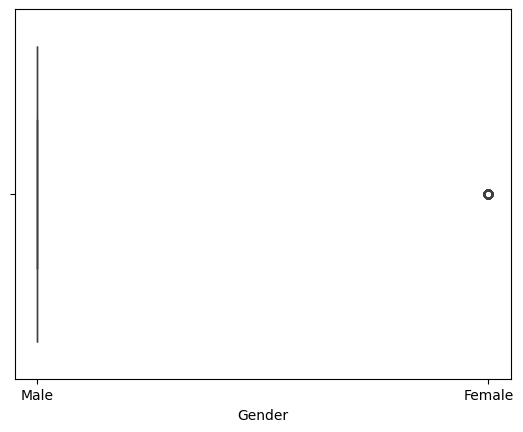

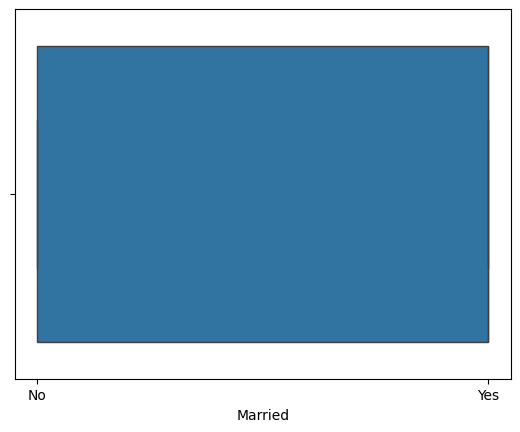

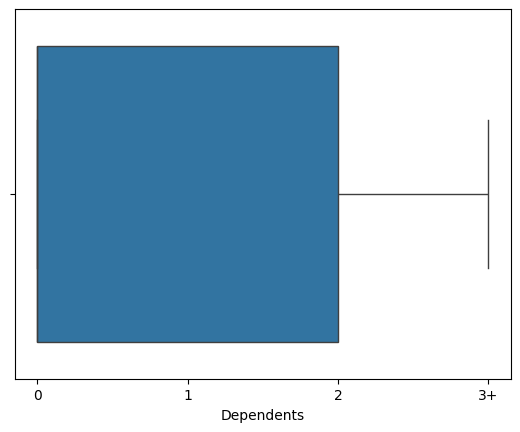

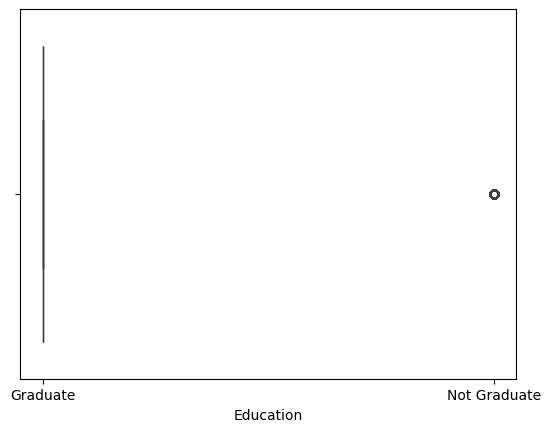

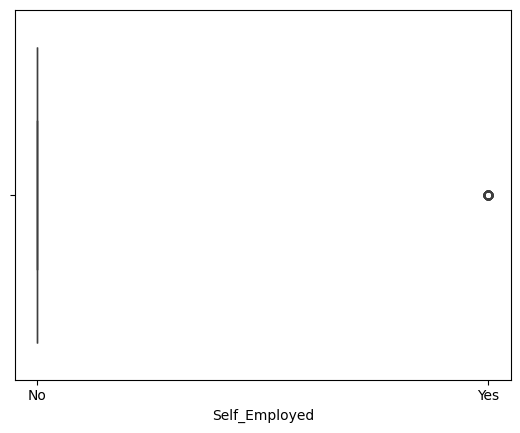

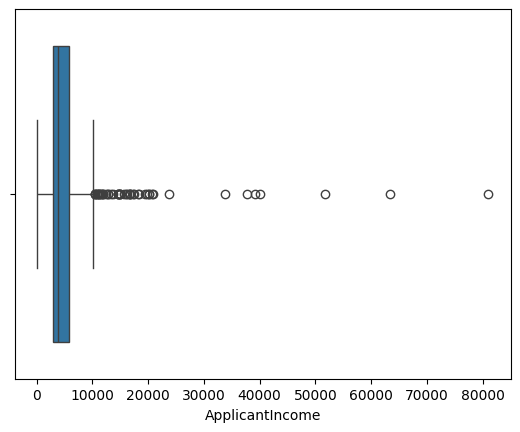

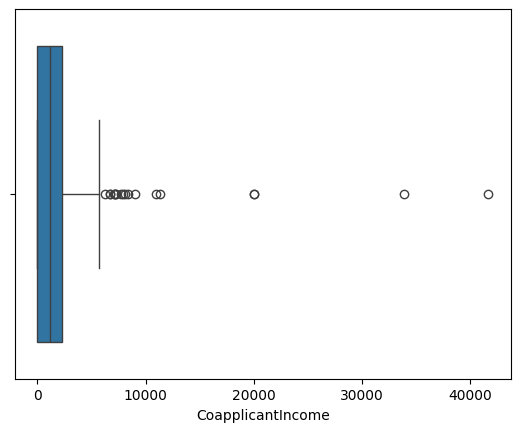

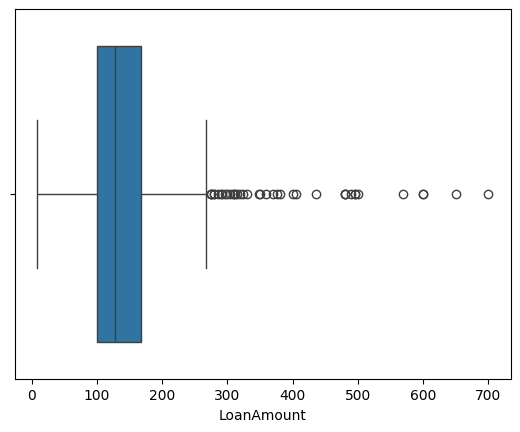

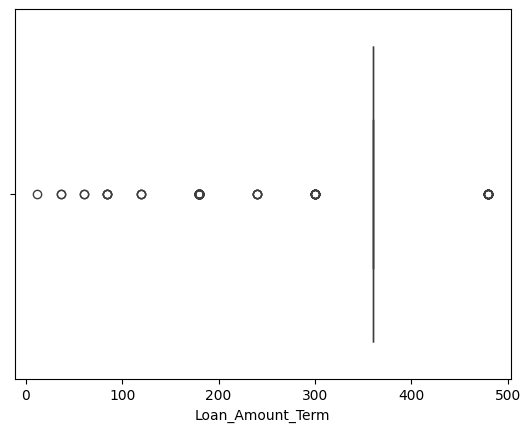

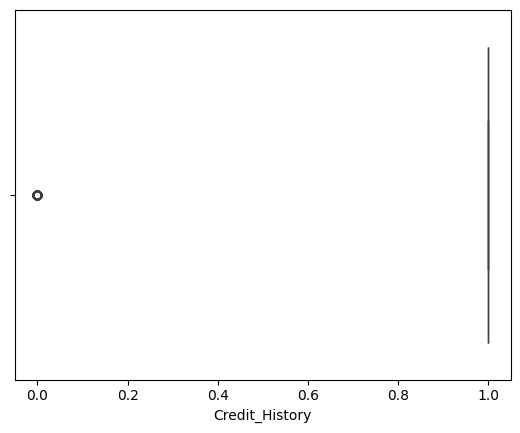

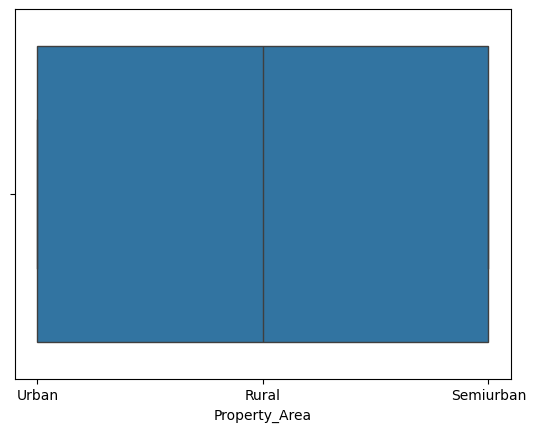

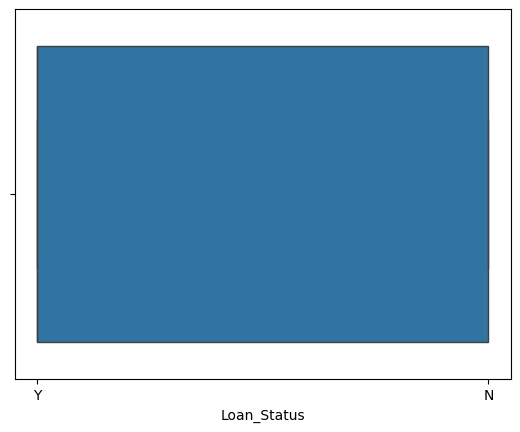

In [6]:
for i in loan_df.columns:
    sns.boxplot(x=loan_df[i])
    plt.show()

### 3. Feature engineering

In [4]:
yes_df=loan_df.loc[loan_df['Loan_Status']=='Y']
yes_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
yes_df.isna().sum()

Gender                8
Married               3
Dependents            9
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term      8
Credit_History       37
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#  ENCONDING FOR YES CATEGORY
yes_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
yes_df['Married'].replace({'Yes':1,'No':0},inplace=True)
yes_df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
yes_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
yes_df['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
yes_df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)  
yes_df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

## Handling Missing values by KNN imputation

In [6]:
#  HANDLING MISSING VALUES by KNN IMPUTER FOR YES CATEGORY
impute_yes=KNNImputer()
array=impute_yes.fit_transform(yes_df)
new_yes=pd.DataFrame(array,columns=yes_df.columns)
new_yes.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0


In [7]:
new_yes.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
no_df=loan_df.loc[loan_df['Loan_Status']=='N']
no_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N


In [9]:
no_df.isna().sum()

Gender                5
Married               0
Dependents            6
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term      6
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# label encoding for NO Category
no_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
no_df['Married'].replace({'Yes':1,'No':0},inplace=True)
no_df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
no_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
no_df['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
no_df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)  
no_df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [9]:
no_impute=KNNImputer()
array1=no_impute.fit_transform(no_df)
new_no=pd.DataFrame(array1,columns=no_df.columns)
new_no.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,3.0,1.0,0.0,3036.0,2504.0,158.0,360.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,12841.0,10968.0,349.0,360.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1853.0,2840.0,114.0,360.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3510.0,0.0,76.0,360.0,0.0,2.0,0.0


In [12]:
new_no.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
no_df.select_dtypes(include=object).head()

""
1
7
9
13
17


In [10]:
final_df=pd.concat([new_no,new_yes])
final_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,3.0,1.0,0.0,3036.0,2504.0,158.0,360.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,12841.0,10968.0,349.0,360.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1853.0,2840.0,114.0,360.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3510.0,0.0,76.0,360.0,0.0,2.0,0.0


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 421
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 62.4 KB


## 4. Feature selection

## 5. Train test split

In [11]:
x=final_df.drop('Loan_Status',axis=1)
y=final_df['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2,stratify=y)

### 6. Model training

In [31]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

## 7. Evaluation

### on train data set

In [19]:
y_pred_train=rf_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
cl_report=classification_report(y_train,y_pred_train)

print('Confusion matrix for train dataset>>\n',cnf)
print('Classification report >>\n',cl_report)

Confusion matrix for train dataset>>
 [[154   0]
 [  0 337]]
Classification report >>
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       154
         1.0       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



### ON test data set

In [20]:
y_pred_test=rf_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred_test)
cl_report=classification_report(y_test,y_pred_test)

print('Confusion matrix for train dataset>>\n',cnf)
print('Classification report >>\n',cl_report)

Confusion matrix for train dataset>>
 [[21 17]
 [ 8 77]]
Classification report >>
               precision    recall  f1-score   support

         0.0       0.72      0.55      0.63        38
         1.0       0.82      0.91      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.79      0.80      0.79       123



### Feature Selection

In [ ]:
Embedded Method : Feature Importance 


<Axes: >

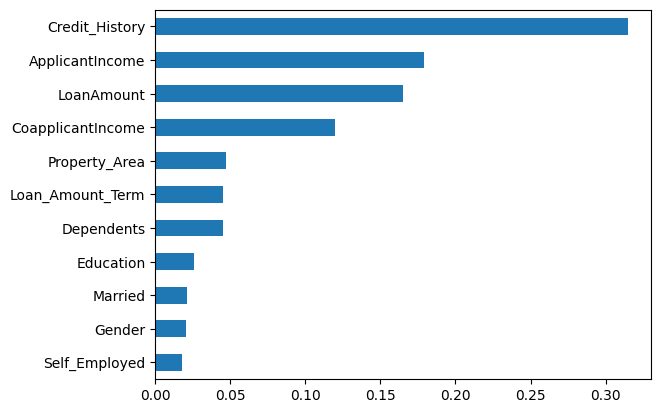

In [32]:
array=rf_model.feature_importances_
s=pd.Series(array , index=x.columns).sort_values()
s.plot(kind='barh')

## 7. Hyperparameter Tuning

In [22]:
rf_model=RandomForestClassifier(random_state=1,max_features='sqrt')

grid= {'n_estimators':range(10,80,10),
    "criterion":['gini','entropy'],
      'max_depth':range(5,15),
      'min_samples_split':range(5,15),
      'min_samples_leaf':range(4,8)}

gscv_model=GridSearchCV(estimator=rf_model , param_grid=grid , cv=4,n_jobs=-1)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(5, 15),
                         'n_estimators': range(10, 80, 10)})

In [33]:
gscv_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=20, random_state=1)

In [34]:
rf_model=gscv_model.best_estimator_
rf_model.fit(x_train,y_train)
y_pred_train=rf_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
cl_report=classification_report(y_train,y_pred_train)

print('Confusion matrix for train dataset>>\n',cnf)
print('Classification report >>\n',cl_report)

Confusion matrix for train dataset>>
 [[ 89  65]
 [  5 332]]
Classification report >>
               precision    recall  f1-score   support

         0.0       0.95      0.58      0.72       154
         1.0       0.84      0.99      0.90       337

    accuracy                           0.86       491
   macro avg       0.89      0.78      0.81       491
weighted avg       0.87      0.86      0.85       491



In [35]:
y_pred_test=rf_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred_test)
cl_report=classification_report(y_test,y_pred_test)

print('Confusion matrix for train dataset>>\n',cnf)
print('Classification report >>\n',cl_report)

Confusion matrix for train dataset>>
 [[19 19]
 [ 5 80]]
Classification report >>
               precision    recall  f1-score   support

         0.0       0.79      0.50      0.61        38
         1.0       0.81      0.94      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.80      0.80      0.79       123



<Axes: >

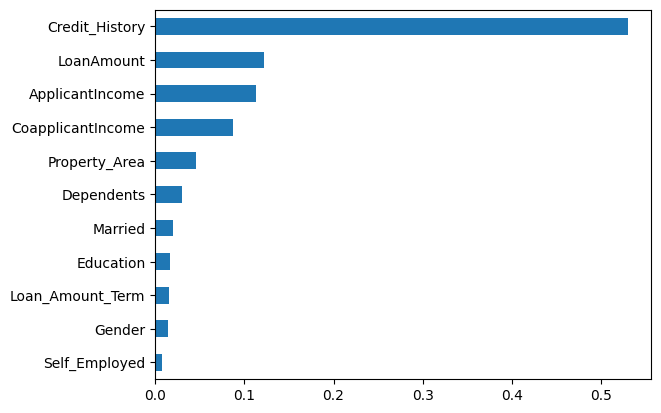

In [30]:
array=rf_model.feature_importances_
s=pd.Series(array , index=x.columns).sort_values()
s.plot(kind='barh')

# Final Model

In [13]:
rf_model=RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=20, random_state=1)

rf_model.fit(x_train,y_train)

print('Accuracy on train :',rf_model.score(x_train,y_train))
print('Accuracy on train :',rf_model.score(x_test,y_test))

Accuracy on train : 0.8574338085539714
Accuracy on train : 0.8048780487804879


## Save model

In [14]:
import pickle 
with open('loan_randomforest.pkl' ,'wb') as f:
    pickle.dump(rf_model ,f)

# encoding

In [16]:
import json
data={
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Dependents':{'0':0,'1':1,'2':2,'3+':3},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Semiurban':1,'Urban':2,'Rural':0},
}

with open('loan_encod.json','w') as f:
    json.dump(data ,f)

In [ ]:
yes_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
yes_df['Married'].replace({'Yes':1,'No':0},inplace=True)
yes_df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
yes_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
yes_df['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
yes_df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)  
yes_df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [17]:
rf_model.feature_names_in_

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)